In [6]:
from math import sqrt

import torch
import matplotlib.pyplot as plt

from torchfem import Truss

torch.set_default_dtype(torch.double)

## Figure 5.1 - Truss sample

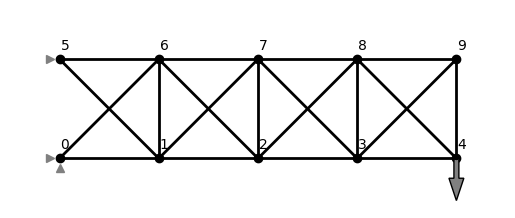

In [7]:
n1 = torch.linspace(0.0, 4.0, 5)
n2 = torch.linspace(0.0, 1.0, 2)
n1, n2 = torch.stack(torch.meshgrid(n1, n2, indexing="xy"))
nodes = torch.stack([n1.ravel(), n2.ravel()], dim=1)

elements = torch.tensor(
    [
        [0, 1],
        [1, 2],
        [2, 3],
        [3, 4],
        [5, 6],
        [6, 7],
        [7, 8],
        [8, 9],
        [1, 5],
        [0, 6],
        [2, 6],
        [1, 7],
        [3, 7],
        [2, 8],
        [4, 8],
        [3, 9],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9],
    ]
)

forces = torch.zeros_like(nodes)
forces[4, 1] = -0.1
displacements = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[0, 0] = True
constraints[0, 1] = True
constraints[5, 0] = True
areas = 10 * torch.ones((len(elements)))
moduli = torch.ones((len(elements)))

truss_sample = Truss(nodes, elements, forces, displacements, constraints, areas, moduli)
u, f = truss_sample.solve()
sigma = truss_sample.compute_stress(u)
truss_sample.plot()
plt.savefig("../figures/truss_sample.svg", bbox_inches="tight")
plt.show()

## Figure 5.2 - Single truss element

<Figure size 300x300 with 0 Axes>

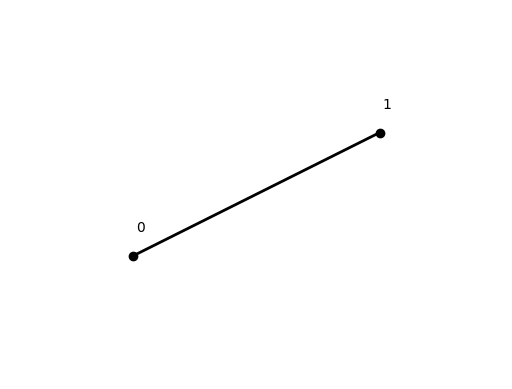

In [8]:
nodes = torch.tensor([[0.0, 0.0], [1.0, 0.5]])
elements = torch.tensor([[0, 1]])
forces = torch.zeros_like(nodes)
displacements = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
areas = torch.ones((len(elements)))
moduli = torch.ones((len(elements)))

plt.figure(figsize=(3, 3))
single_truss = Truss(nodes, elements, forces, displacements, constraints, areas, moduli)
single_truss.plot()
plt.savefig("../figures/single_truss.svg", bbox_inches="tight")
plt.show()

## Figure 5.3 - Truss sample

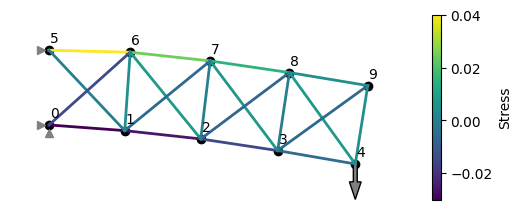

In [9]:
truss_sample.plot(u=u, sigma=sigma)
plt.savefig("../figures/truss_sample_solved.svg", bbox_inches="tight")
plt.show()

## Example 26 - Three bar truss

Consider the truss shown below, which is subjected to a force $P$ indicated by the gray arrow and supports indicated by gray triangles. It has three nodes 
$$
    \mathcal{N} = \{\mathbf{x}^0=(1,0)^\top, \mathbf{x}^1=(0,0)^\top,\mathbf{x}^2=(0,1)^\top \}
$$
and three elements 
$$
    \mathcal{E} = \{(\mathbf{x}^0, \mathbf{x}^1), (\mathbf{x}^0, \mathbf{x}^2), (\mathbf{x}^1, \mathbf{x}^2)\}.
$$

<Figure size 300x300 with 0 Axes>

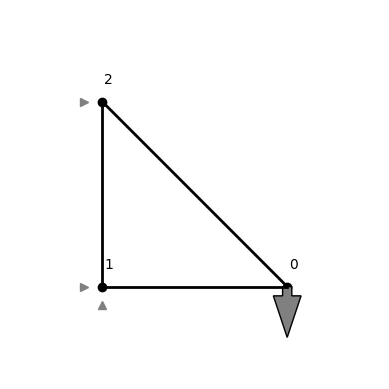

<Figure size 300x300 with 0 Axes>

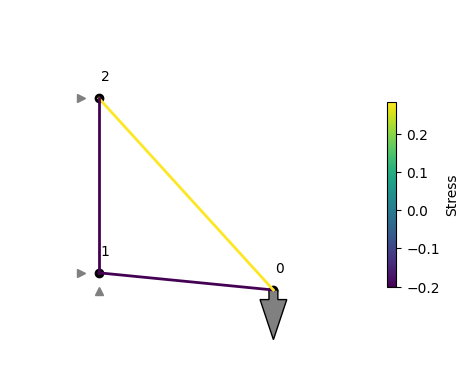

In [10]:
nodes = torch.tensor([[1.0, 0.0], [0.0, 0.0], [0.0, 1.0]])
elements = torch.tensor([[0, 1], [0, 2], [1, 2]])
forces = torch.zeros_like(nodes)
forces[0, 1] = -0.2
displacements = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[1, 0] = True
constraints[1, 1] = True
constraints[2, 0] = True
areas = torch.ones((len(elements)))
moduli = 10.0 * torch.ones((len(elements)))

three_bar_truss = Truss(
    nodes, elements, forces, displacements, constraints, areas, moduli
)
plt.figure(figsize=(3, 3))
three_bar_truss.plot()
plt.savefig("../figures/three_bar_truss.svg", bbox_inches="tight", transparent=True)
plt.show()

u, f = three_bar_truss.solve()
sigma = three_bar_truss.compute_stress(u)
plt.figure(figsize=(3, 3))
three_bar_truss.plot(u=u, sigma=sigma)
plt.savefig(
    "../figures/three_bar_truss_solved.svg", bbox_inches="tight", transparent=True
)
plt.show()